# 8b. Polynomial ODEs. 

Note: this lab is a little long.  Please focus on Ex.1.  Consider Ex.2 to be additional exercise, for students that finish Ex.1 quickly.

----

**Ex.1)** Write a Python function **polyODEsim** that takes as input a polynomial **P**, and plots:

1. The roots of the polynomial.
2. Several solution to the ODE $\frac{dz}{dt} = iP(z)$ with initial conditions taken from an evenly-spaced 5-by-5 lattice of points in the plane.  The four corners of your lattice should form a rectangle that contains all the roots of your polynomial. Use numpy's **mgrid** command to generate the lattice of initial values.
3. Include a quiver plot for the vector field $z \longmapsto iP(z)$.

Include plots for the polynomials: $z^3-1$, $z^5-1$, $z^4-z^3-z+1$.  Try also the polynomial a non-real coefficient: $-iz$.

What kind of behaviour do you see.  Can you characterize the periodic solutions?  The ones that converge to roots?  Which roots are limits of solutions, and which ones are not?


In [3]:
import numpy as np
from scipy import integrate as itg
import itertools as it
import numpy.polynomial.polynomial as npp
import operator as op

import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
def polyODEsim(P, maxS = 10, steps = 10000):
    '''
    
    '''
    ## Step 1: find and plot the roots
    R = npp.polyroots(P)
    
    minx = min([z.real for z in R])
    maxx = max([z.real for z in R])
    delx = maxx - minx
    miny = min([z.imag for z in R])
    maxy = max([z.imag for z in R])
    dely = maxy - miny
    dxm = minx - delx/4
    dxM = maxx + delx/4
    dym = miny - dely/4
    dyM = maxy + dely/4
    wx = dxM - dxm
    wy = dyM - dym
    
    plt.figure(figsize=(8,8))
    plt.xlim(dxm, dxM)
    plt.ylim(dym, dyM)
    plt.plot([r.real for r in R], [r.imag for r in R], 'ko')
    
    ## Step 2: set up our ODE z' = iP(z)
    ODE = lambda Y, t: [((1j)*npp.polyval(Y[0] + Y[1]*1j, P)).real, ((1j)*npp.polyval(Y[0] + Y[1]*1j, P)).imag]
    t = np.linspace(0, maxS, steps)
    
    ## Step 3: compute a grid of solutions
    X, Y = np.mgrid[dxm:dxM:5j, dym:dyM:5j]
    for i, j in it.product(range(Y.shape[0]), range(Y.shape[1])):
        Sol = itg.odeint(ODE, [X[i, j], Y[i,j]], t)
        plt.plot([X[i,j]], [Y[i,j]], 'yo')
        plt.plot(Sol[:,0], Sol[:,1])
    
    X, Y = np.mgrid[dxm:dxM:20j, dym:dyM:20j]
    Vx = np.zeros(X.shape)
    Vy = np.zeros(Y.shape)
    for i,j in it.product(range(Y.shape[0]), range(Y.shape[1])):
        V = ODE( [X[i,j], Y[i,j]], 0)
        Vx[i,j] = V[0]
        Vy[i,j] = V[1]
    plt.quiver(X, Y, Vx, Vy, angles = 'xy')

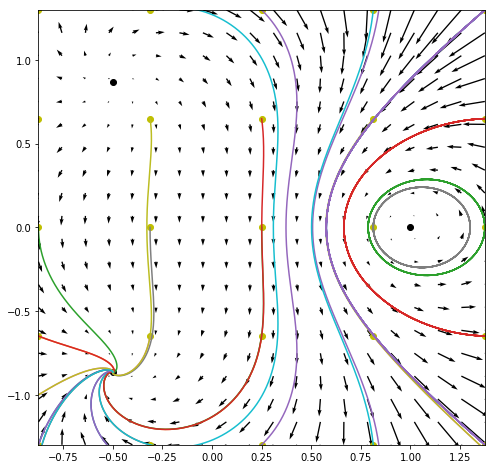

In [7]:
polyODEsim([-1, 0, 0, 1])

**Ex.2)** We continue to study the behaviour of the ODE

$$\frac{dz}{dt} = iP(z).$$

**(a)** Create a Python function that takes as input a polynomial.  Your function will generate a **basins of attraction plot**, i.e. at each point $z_0$ in the plot you will compute a solution to the above ODE satisfying the initial condition $z(0)=z_0$.  Depending on the behaviour of the solution you will color the point $z_0$ accordingly.  You will choose colours according to each of the roots.  If your solution converges to a root, colour the point $z_0$ accordingly.  Similarly, choose a colour for initial values $z_0$ corresponding to periodic solutions.  And colour the point $z_0$ black if the solution starting at $z_0$ neither converges to a root, nor is it periodic.  As with our Newton method basins of attraction plots, use matplotlib's **imshow** command for your primary plot.

**(b)** Include plots for the same polynomials listed in **Ex.1**.

**(c)** Do your experiments suggest that for any polynomial with real coefficients, the solutions to the above ODE are either periodic or converge to a root?  If so, can you identify which roots are limits of solutions, and which initial values give periodic solutions? 

Note: A polynomial $$c_nz^n + c_{n-1}z^{n-1} + \cdots + c_1 z + c_0$$ is said to have real coefficients if $c_i \in \mathbb R$ for all $i$.